In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
dfba=pd.read_excel(r"E:\LLM_R\rerawdata\Bard_MFQ_Score.xls")
dfbi=pd.read_excel(r"E:\LLM_R\rerawdata\Bing_MFQ_Score.xls")
dfcg=pd.read_excel(r"E:\LLM_R\rerawdata\ChatGPT_MFQ_Score.xls")
dfhum=pd.read_csv(r"E:\LLM_R\Moral (2).csv")


In [4]:
df1=dfba[["Bard","MFQ_HARM_AVG","MFQ_FAIRNESS_AVG","MFQ_INGROUP_AVG","MFQ_AUTHORITY_AVG","MFQ_PURITY_AVG","MFQ_PROGRESSIVISM"]]
df2=dfbi[["Bing","MFQ_HARM_AVG","MFQ_FAIRNESS_AVG","MFQ_INGROUP_AVG","MFQ_AUTHORITY_AVG","MFQ_PURITY_AVG","MFQ_PROGRESSIVISM"]]
df3=dfcg[["Chatgpt","MFQ_HARM_AVG","MFQ_FAIRNESS_AVG","MFQ_INGROUP_AVG","MFQ_AUTHORITY_AVG","MFQ_PURITY_AVG","MFQ_PROGRESSIVISM"]]
df4=dfhum[["Human","MFQ_HARM_AVG","MFQ_FAIRNESS_AVG","MFQ_INGROUP_AVG","MFQ_AUTHORITY_AVG","MFQ_PURITY_AVG","MFQ_PROGRESSIVISM"]]
df1.rename(columns={'Bard':'Participant'},inplace= True)
df2.rename(columns={'Bing':'Participant'},inplace= True)
df3.rename(columns={'Chatgpt':'Participant'},inplace= True)
df4.rename(columns={'Human':'Participant'},inplace= True)

C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\4156495551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Bard':'Participant'},inplace= True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\4156495551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Bing':'Participant'},inplace= True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\4156495551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [5]:
df1.describe()

,MFQ_HARM_AVG,MFQ_FAIRNESS_AVG,MFQ_INGROUP_AVG,MFQ_AUTHORITY_AVG,MFQ_PURITY_AVG,MFQ_PROGRESSIVISM
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,3.816038,4.216981,2.320755,1.570755,1.132075,2.341981
std,0.290684,0.421871,0.283256,0.337473,0.464105,0.306116
min,3.000000,3.000000,1.500000,1.000000,0.000000,1.666667
25%,3.750000,4.000000,2.250000,1.500000,1.000000,2.125000
50%,3.750000,4.250000,2.500000,1.500000,1.000000,2.333333
75%,4.000000,4.500000,2.500000,1.750000,1.500000,2.500000
max,4.500000,5.000000,2.750000,2.750000,2.500000,3.083333


In [6]:
df2.describe()


,MFQ_HARM_AVG,MFQ_FAIRNESS_AVG,MFQ_INGROUP_AVG,MFQ_AUTHORITY_AVG,MFQ_PURITY_AVG,MFQ_PROGRESSIVISM
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,4.160377,4.235849,2.490566,2.089623,1.202830,2.270440
std,1.049375,0.601311,0.761076,0.703860,1.055044,0.783085
min,0.000000,3.000000,0.000000,0.000000,0.000000,-0.166667
25%,4.000000,4.000000,2.250000,2.000000,1.000000,2.250000
50%,4.250000,4.000000,2.750000,2.000000,1.000000,2.500000
75%,5.000000,4.750000,3.000000,2.250000,1.000000,2.583333
max,5.000000,5.000000,4.000000,3.750000,5.000000,3.583333


In [7]:
df3.describe()

,MFQ_HARM_AVG,MFQ_FAIRNESS_AVG,MFQ_INGROUP_AVG,MFQ_AUTHORITY_AVG,MFQ_PURITY_AVG,MFQ_PROGRESSIVISM
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,4.622642,4.051887,3.000000,2.566038,2.127358,1.772799
std,0.217186,0.132999,0.069338,0.203047,0.296707,0.168968
min,4.000000,4.000000,2.750000,2.000000,1.500000,1.166667
25%,4.500000,4.000000,3.000000,2.500000,2.000000,1.666667
50%,4.750000,4.000000,3.000000,2.500000,2.000000,1.791667
75%,4.750000,4.000000,3.000000,2.750000,2.250000,1.875000
max,5.000000,4.500000,3.250000,3.000000,2.750000,2.083333


In [8]:
df4.describe()

,MFQ_HARM_AVG,MFQ_FAIRNESS_AVG,MFQ_INGROUP_AVG,MFQ_AUTHORITY_AVG,MFQ_PURITY_AVG,MFQ_PROGRESSIVISM
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,3.556604,3.943396,3.278302,2.886792,3.033019,0.683962
std,0.647928,0.520358,0.783944,0.721520,0.758030,0.746002
min,1.750000,2.750000,1.250000,0.750000,1.250000,-0.958333
25%,3.250000,3.750000,2.750000,2.500000,2.500000,0.125000
50%,3.500000,4.000000,3.250000,3.000000,3.000000,0.625000
75%,4.000000,4.250000,3.750000,3.250000,3.500000,1.041667
max,5.000000,5.000000,4.750000,4.500000,4.500000,2.958333


In [9]:
df1['Individual']=df1['MFQ_HARM_AVG']+ df1['MFQ_FAIRNESS_AVG' ]
df1['Group']=df1['MFQ_INGROUP_AVG']+ df1['MFQ_AUTHORITY_AVG']+df1['MFQ_PURITY_AVG']+df1['MFQ_PROGRESSIVISM']
df2['Individual']=df2['MFQ_HARM_AVG']+ df2['MFQ_FAIRNESS_AVG' ]
df2['Group']=df2['MFQ_INGROUP_AVG']+ df2['MFQ_AUTHORITY_AVG']+df2['MFQ_PURITY_AVG']+df2['MFQ_PROGRESSIVISM']
df3['Individual']=df3['MFQ_HARM_AVG']+ df3['MFQ_FAIRNESS_AVG' ]
df3['Group']=df3['MFQ_INGROUP_AVG']+ df3['MFQ_AUTHORITY_AVG']+df3['MFQ_PURITY_AVG']+df3['MFQ_PROGRESSIVISM']
df4['Individual']=df4['MFQ_HARM_AVG']+ df4['MFQ_FAIRNESS_AVG' ]
df4['Group']=df4['MFQ_INGROUP_AVG']+ df4['MFQ_AUTHORITY_AVG']+df4['MFQ_PURITY_AVG']+df4['MFQ_PROGRESSIVISM']

C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\1814789403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Individual']=df1['MFQ_HARM_AVG']+ df1['MFQ_FAIRNESS_AVG' ]
C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\1814789403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group']=df1['MFQ_INGROUP_AVG']+ df1['MFQ_AUTHORITY_AVG']+df1['MFQ_PURITY_AVG']+df1['MFQ_PROGRESSIVISM']
C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\1814789403.py:3: SettingWithCopyWarning: 
A value is trying to 

In [10]:
df1["Individual"].mean()

8.033018867924529

<AxesSubplot:xlabel='MFQ_FAIRNESS_AVG', ylabel='Count'>

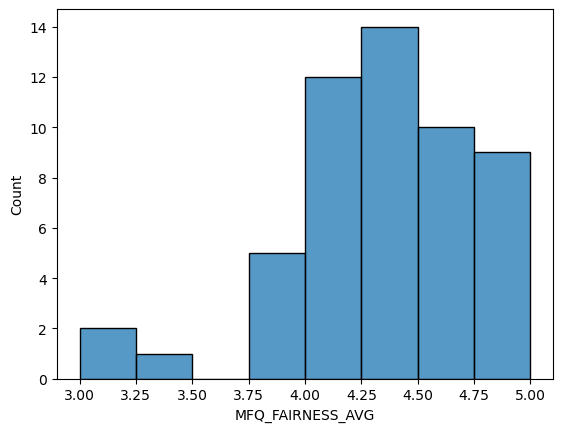

In [11]:
sns.histplot(x=df1['MFQ_FAIRNESS_AVG'])

<AxesSubplot:xlabel='MFQ_FAIRNESS_AVG', ylabel='Count'>

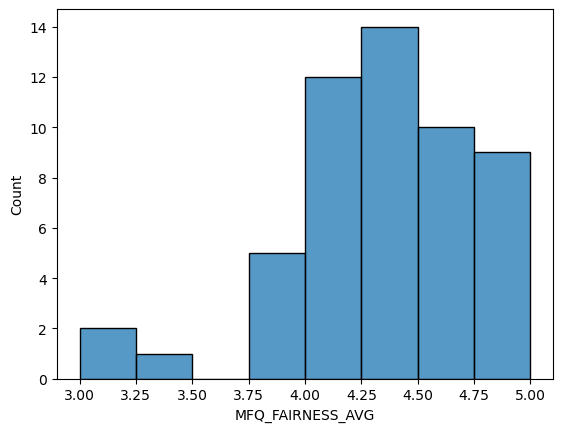

In [12]:
sns.histplot(x=df1['MFQ_FAIRNESS_AVG'])

In [13]:
df1=df1.append(df2,ignore_index=True)
df1=df1.append(df3,ignore_index=True)
df1=df1.append(df4,ignore_index=True)

C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\135620088.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df2,ignore_index=True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\135620088.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df3,ignore_index=True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_21968\135620088.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df4,ignore_index=True)


In [14]:
df1.describe()

,MFQ_HARM_AVG,MFQ_FAIRNESS_AVG,MFQ_INGROUP_AVG,MFQ_AUTHORITY_AVG,MFQ_PURITY_AVG,MFQ_PROGRESSIVISM,Individual,Group
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,4.038915,4.112028,2.772406,2.278302,1.873821,1.767296,8.150943,8.691824
std,0.753323,0.467685,0.680922,0.732878,1.046744,0.871639,0.867515,1.473046
min,0.000000,2.750000,0.000000,0.000000,0.000000,-0.958333,4.250000,2.375000
25%,3.750000,4.000000,2.500000,1.750000,1.000000,1.302083,7.500000,7.541667
50%,4.000000,4.000000,3.000000,2.250000,1.750000,1.895833,8.500000,8.729167
75%,4.750000,4.500000,3.000000,2.750000,2.500000,2.458333,8.750000,9.552083
max,5.000000,5.000000,4.750000,4.500000,5.000000,3.583333,10.000000,12.083333


In [15]:
df1['Individual']=df1['MFQ_HARM_AVG']+ df1['MFQ_FAIRNESS_AVG' ]
df1['Group']=df1['MFQ_INGROUP_AVG']+ df1['MFQ_AUTHORITY_AVG']+df1['MFQ_PURITY_AVG']+df1['MFQ_PROGRESSIVISM']
df1

,Participant,MFQ_HARM_AVG,MFQ_FAIRNESS_AVG,MFQ_INGROUP_AVG,MFQ_AUTHORITY_AVG,MFQ_PURITY_AVG,MFQ_PROGRESSIVISM,Individual,Group
0,Bard,3.00,4.00,2.50,1.75,1.25,1.666667,7.00,7.166667
1,Bard,3.75,4.00,2.50,1.25,1.75,2.041667,7.75,7.541667
2,Bard,4.00,4.25,2.50,1.00,1.00,2.625000,8.25,7.125000
3,Bard,4.50,4.00,2.50,1.50,0.75,2.666667,8.50,7.416667
4,Bard,3.75,4.25,2.25,1.75,0.75,2.416667,8.00,7.166667
...,...,...,...,...,...,...,...,...,...
207,Human,3.25,4.75,3.25,3.00,3.25,0.833333,8.00,10.333333
208,Human,2.75,4.00,4.50,4.00,2.00,-0.125000,6.75,10.375000
209,Human,4.75,5.00,2.25,2.00,1.50,2.958333,9.75,8.708333
210,Human,3.00,3.75,4.00,3.25,3.00,-0.041667,6.75,10.208333


<AxesSubplot:xlabel='Group', ylabel='Count'>

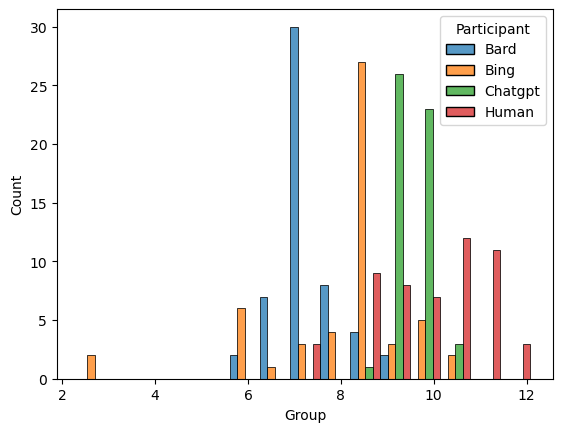

In [16]:
sns.histplot(x= "Group", hue= "Participant",data= df1,multiple="dodge")

[Text(0.5, 0, 'Participants'),
 Text(0, 0.5, 'Harm/Care scores'),
 Text(0.5, 1.0, 'Harm/Care')]

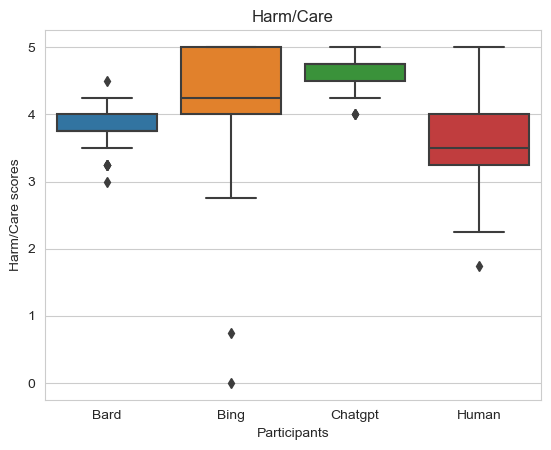

In [17]:
sns.set_style('whitegrid')
HM=sns.boxplot(x='Participant',y='MFQ_HARM_AVG',data=df1)
HM.set(xlabel="Participants", ylabel="Harm/Care scores",title= "Harm/Care")

[Text(0.5, 0, 'Participants'),
 Text(0, 0.5, 'Fairness/Reciprocity scores'),
 Text(0.5, 1.0, 'Fairness/Reciprocity')]

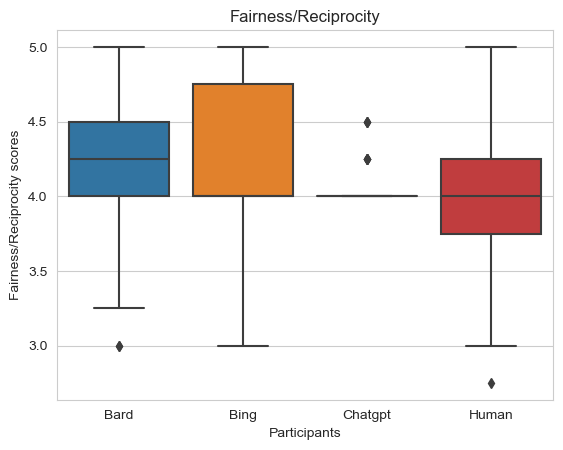

In [18]:
FI=sns.boxplot(x='Participant',y='MFQ_FAIRNESS_AVG',data=df1)
FI.set(xlabel="Participants",ylabel="Fairness/Reciprocity scores", title="Fairness/Reciprocity")

[Text(0.5, 0, 'Participants'),
 Text(0, 0.5, 'Ingroup/Loyalty scores'),
 Text(0.5, 1.0, 'Ingroup/Loyalty')]

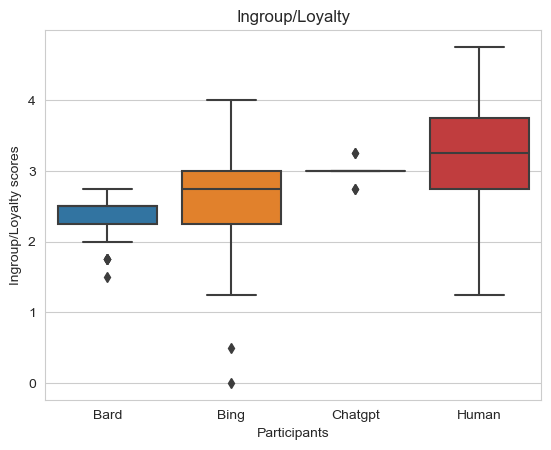

In [19]:
IN=sns.boxplot(x='Participant',y='MFQ_INGROUP_AVG',data=df1)
IN.set(xlabel="Participants",ylabel="Ingroup/Loyalty scores",title="Ingroup/Loyalty")

[Text(0.5, 0, 'Participants'),
 Text(0, 0.5, 'Authority/Respect scores'),
 Text(0.5, 1.0, 'Authority/Respect')]

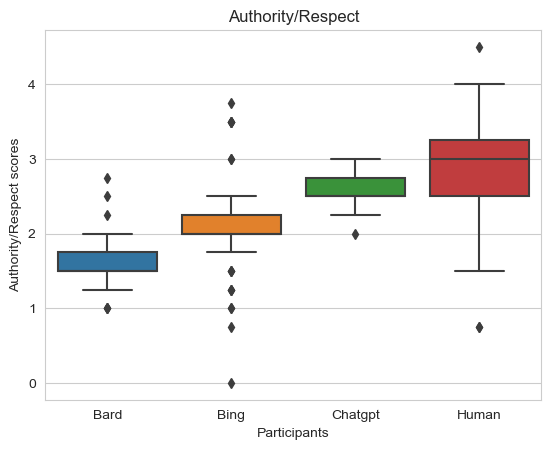

In [20]:
AU=sns.boxplot(x='Participant',y='MFQ_AUTHORITY_AVG',data=df1)
AU.set(xlabel="Participants",ylabel="Authority/Respect scores",title="Authority/Respect")

[Text(0.5, 0, 'Participants'),
 Text(0, 0.5, 'Purity/Sanctity scores'),
 Text(0.5, 1.0, 'Purity/Sanctity')]

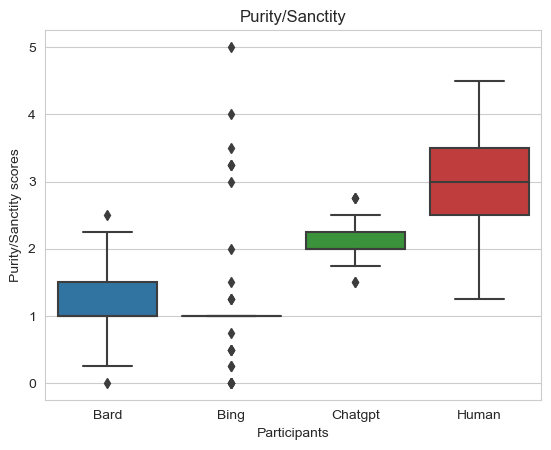

In [21]:
PU=sns.boxplot(x='Participant',y='MFQ_PURITY_AVG',data=df1)
PU.set(xlabel="Participants",ylabel="Purity/Sanctity scores", title="Purity/Sanctity")

[Text(0.5, 0, 'Participants'),
 Text(0, 0.5, 'Moral Progressivism scores'),
 Text(0.5, 1.0, 'Moral Progressivism')]

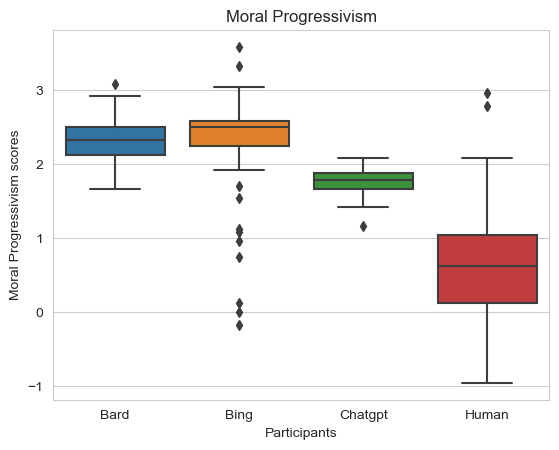

In [22]:
PR=sns.boxplot(x='Participant',y='MFQ_PROGRESSIVISM',data=df1)
PR.set(xlabel="Participants",ylabel="Moral Progressivism scores",title="Moral Progressivism")

In [32]:
df1=df1.replace("Bard",1)
df1=df1.replace("Bing",2)
df1=df1.replace("Chatgpt",3)
df1=df1.replace("Human",4)

In [35]:
model=ols('MFQ_HARM_AVG ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table).round(3)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),33.803,3.0,11.268,27.271,0.0,0.282,0.271
Residual,85.939,208.0,0.413,NaN,NaN,NaN,NaN


In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['MFQ_HARM_AVG'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.3443,0.0319,0.0209,0.6677,True
1,3,0.8066,0.0,0.4832,1.13,True
1,4,-0.2594,0.1638,-0.5828,0.064,False
2,3,0.4623,0.0016,0.1389,0.7857,True
2,4,-0.6038,0.0,-0.9272,-0.2804,True
3,4,-1.066,0.0,-1.3894,-0.7426,True


In [43]:
model=ols('MFQ_FAIRNESS_AVG ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),3.095224,3.0,1.031741,4.984188,0.002326,0.067066,0.053371
Residual,43.056604,208.0,0.207003,NaN,NaN,NaN,NaN


In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['MFQ_FAIRNESS_AVG'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0189,0.9966,-0.21,0.2478,False
1,3,-0.1651,0.2451,-0.394,0.0638,False
1,4,-0.2736,0.0119,-0.5025,-0.0447,True
2,3,-0.184,0.1626,-0.4129,0.0449,False
2,4,-0.2925,0.006,-0.5214,-0.0635,True
3,4,-0.1085,0.6101,-0.3374,0.1204,False


In [38]:
model=ols('MFQ_INGROUP_AVG ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),32.919850,3.0,10.973283,34.701651,2.748012e-18,0.329337,0.318838
Residual,67.038194,212.0,0.316218,NaN,NaN,NaN,NaN


In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['MFQ_INGROUP_AVG'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.1698,0.412,-0.1147,0.4543,False
1,3,0.6792,0.0,0.3948,0.9637,True
1,4,0.9575,0.0,0.6731,1.242,True
2,3,0.5094,0.0,0.225,0.7939,True
2,4,0.7877,0.0,0.5033,1.0722,True
3,4,0.2783,0.0577,-0.0062,0.5628,False


In [51]:
model=ols('MFQ_AUTHORITY_AVG ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),52.431604,3.0,17.477201,59.693634,6.994300e-28,0.462645,0.453722
Residual,60.898585,208.0,0.292782,NaN,NaN,NaN,NaN


In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['MFQ_AUTHORITY_AVG'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.5189,0.0,0.2466,0.7911,True
1,3,0.9953,0.0,0.7231,1.2675,True
1,4,1.316,0.0,1.0438,1.5883,True
2,3,0.4764,0.0001,0.2042,0.7486,True
2,4,0.7972,0.0,0.5249,1.0694,True
3,4,0.3208,0.0136,0.0485,0.593,True


In [54]:
model=ols('MFQ_PURITY_AVG ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),127.647111,3.0,42.549037,85.476064,4.511069e-36,0.552137,0.544505
Residual,103.540094,208.0,0.497789,NaN,NaN,NaN,NaN


In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['MFQ_PURITY_AVG'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.0708,0.9551,-0.2842,0.4257,False
1,3,0.9953,0.0,0.6403,1.3502,True
1,4,1.9009,0.0,1.546,2.2559,True
2,3,0.9245,0.0,0.5696,1.2795,True
2,4,1.8302,0.0,1.4752,2.1852,True
3,4,0.9057,0.0,0.5507,1.2606,True


In [41]:
model=ols('MFQ_PROGRESSIVISM ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),98.774466,3.0,32.924822,99.622109,2.901929e-40,0.585019,0.578015
Residual,70.065394,212.0,0.330497,NaN,NaN,NaN,NaN


In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['MFQ_PROGRESSIVISM'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.0715,0.9162,-0.3575,0.2144,False
1,3,-0.5692,0.0,-0.8551,-0.2832,True
1,4,-1.658,0.0,-1.944,-1.3721,True
2,3,-0.4976,0.0001,-0.7836,-0.2117,True
2,4,-1.5865,0.0,-1.8724,-1.3005,True
3,4,-1.0888,0.0,-1.3748,-0.8029,True
